# Proyecto MNIST
### Lilia Lobato & Edgar Curti
##### 22/02/2022
Usando la plantilla de ML vista en clase y las bibliotecas sklearnand tensorflow, se pretende identificar dígitos escritos a mano.  
Se utiliza el conjunto de datos MNIST con 60 000 imágenes para entrenamiento y 10 000 imágenes para prueba.  
Se va a probar el rendimiento de los siguientes algoritmos:
* Logistic Regression
* SVM
* Random Forest
* Neural Network (MLP)
* CNN

## 1. Lectura de Datos
MNIST ("Modified National Institute of Standards and Technology") es el conjunto de datos considerado como el "hello world" de la inteligencia artificial.  
![image.png](https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/MnistExamples.png/320px-MnistExamples.png) 
  
Desde su lanzamiento en 1999, este conjunto de imágenes escritas a mano ha servido como base para comparar algoritmos de clasificación.  
Obtenemos los datos desde: [OpenML MNIST](https://www.openml.org/d/554)


In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

Este dataset cuenta con 784 features.  
Es un subconjunto de un conjunto más grande disponible en NIST. Los dígitos se normalizaron en tamaño y se centraron para crear una base de datos ideal para probar técnicas de aprendizaje y métodos de reconocimiento de patrones en datos reales con un esfuerzo mínimo en preprocesamiento y formateo.


In [2]:
print(mnist)

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ..

### Estructura de los datos  
Dentro del mnist podemos encontrar los siguientes conjuntos de información:

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

En data encontramos los datos de entrada. Contenemos 70000 números en total, cada uno de ellos tiene 784 pixeles.

In [4]:
mnist["data"]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


En target se encuentran la respuestas correctas de cada dato. Podemos ver que contamos con 10 valores únicos [0 ... 9] 

In [135]:
mnist["target"]

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

## 2. Procesamiento de Datos

MNIST ya tiene las imagenes pre-procesadas, están normalizadas en tamaño, centradas y sin escala de grises.  
Lo que falta es separar los datos de entrada y las etiquetas:
- X => datos de entrada
- y => datos del target o etiquetas con la respuesta

In [7]:
X, y = mnist["data"], mnist["target"]

### Visualización de Datos
Cada dato de entrada es un arreglo que contiene la información de cada pixel. A simple vista no es posible conocer cual número es.

In [8]:
X = X.to_numpy()
X[1]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,  51., 159., 253., 159.,  50.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

Para poder comprobar que los datos realmente coinciden con las etiquetas, vamos a graficar los pixeles como imágenes de 28x28 e imprimimos su etiqueta correspondiente.

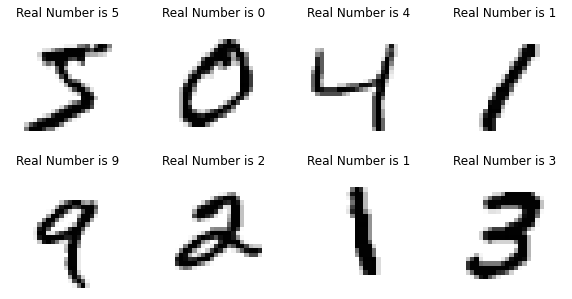

In [9]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, axis = plt.subplots(2, 4, figsize=(10, 5))
for i, ax in enumerate(axis.flat):
    un_numero = X[i]
    any_digit_image = un_numero.reshape(28,28)
    ax.imshow(any_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
    digit = y[i]
    ax.set(title = f"Real Number is {digit}");
    ax.axis("off")

### División de Datos
Dividimos en partes el conjunto X,y para tener una parte para el entrenamiento y otra para el testeo.  
* Para el entrenamiento vamos a tomar 60000 imagenes.
* Para el testeo vamos a tomar 10000 imagenes.

In [36]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

### Normalización de Datos
El algoritmo CNN converge mas rápido con datos entre [0 ... 1] que con datos entre [0 ... 255]

In [37]:
X_train_CNN = X_train/255.0
X_test_CNN = X_test/255.0
X_train_CNN[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

### Reshape de Datos
El algoritmo CNN recibe:
* Un ndarray para los datos por lo que redimenzionamos las imagenes a 3 dimensiones (height = 28px, width = 28px , canal = 1)  
* Un binary class matrix para las etiquetas por lo que convertimos el arreglo de etiquetas en una matriz que tiene valores binarios y tiene columnas iguales al número de categorías en los datos. (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])

In [34]:
from keras.utils.np_utils import to_categorical

X_train_CNN = X_train_CNN.reshape(-1,28,28,1)
X_test_CNN = X_test_CNN.reshape(-1,28,28,1)
y_train_CNN = to_categorical(y_train)
y_test_CNN = to_categorical(y_test)

X_train_CNN.shape, X_test_CNN.shape, y_train_CNN.shape, y_test_CNN.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000, 10), (10000, 10))

## 3. Creación de Modelos
Por cada algoritmo, creamos un modelo.

### SGD Model
Implementa modelos lineales regularizados con aprendizaje de  stochastic gradient descent.  
SGD es simplemente una técnica de optimización y no corresponde a una familia específica de modelos de aprendizaje automático. Es simple pero muy eficiente para ajustar clasificadores lineales y regresores bajo funciones de pérdida convexas.

In [15]:
import numpy as np
from sklearn.linear_model import SGDClassifier
my_model_SDG = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)

### Gaussian Model
Los modelos Naive Bayes son un conjunto de algoritmos de aprendizaje supervisado basados en la aplicación del teorema de Bayes suponiendo independencia condicional entre cada par de características dado el valor de la variable de clase.  
GaussianNB implementa el algoritmo Gaussian Naive Bayes para la clasificación.

In [ ]:
from sklearn.naive_bayes import GaussianNB
my_model_Gaussian = GaussianNB()

### SVM Model
Support-Vector Machines (SVM) son un conjunto de algoritmos de aprendizaje supervisado desarrollados por Vladimir Vapnik y su equipo en los laboratorios AT&T.  
Dado un conjunto de puntos, subconjunto de un conjunto mayor, en el que cada uno de ellos pertenece a una de dos posibles categorías, este modelo es capaz de predecir si un punto nuevo pertenece a una categoría o a la otra.

In [ ]:
from sklearn import svm
my_model_SVM = svm.SVC()

### MLP Model
Multi-layer Perceptron (MLP) es una red neuronal artificial formada por múltiples capas, de tal manera que tiene capacidad para resolver problemas que no son linealmente separables.

In [ ]:
from sklearn.neural_network import MLPClassifier
my_model_MPL = MLPClassifier()

### Logistic Regression Mode
Logistic Regression es un tipo de análisis de regresión utilizado para predecir el resultado de una variable categórica en función de las variables independientes o predictoras. Es útil para modelar la probabilidad de un evento ocurriendo en función de otros factores

In [ ]:
from sklearn.linear_model import LogisticRegression
my_model_Regression = LogisticRegression(penalty="l1", tol=0.01, solver="saga")

### Random Forest Model
Random Forest es una combinación de árboles predictores tal que cada árbol depende de los valores de un vector aleatorio probado independientemente y con la misma distribución para cada uno de estos. Es una modificación sustancial de bagging que construye una larga colección de árboles no correlacionados y luego los promedia.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
my_model_RanForest = RandomForestClassifier(max_depth=20, random_state=0)

### CNN Model
CNN es un tipo de red neuronal artificial utilizada en el reconocimiento y procesamiento de imágenes que está específicamente diseñada para procesar datos de píxeles.  
CNN Model from: [MNIST: Simple CNN keras](https://www.kaggle.com/elcaiseri/mnist-simple-cnn-keras-accuracy-0-99-top-1)  
  
Para este modelo usamos la API secuencial de Keras, donde se debe de poner una capa a la vez:  
* **Capa convolucional (Conv2D):** Es un conjunto de filtros de aprendizaje. Las primeras 2 capas conv2D tienen 32 filtros, las siguientes 2 capas tienen 64 filtros, las siguientes 2 capas tienen 128 filtros y 256 para la ultima capa. ![kernel.png](https://miro.medium.com/max/1010/1*jIv2CLxdXsxvx60Urc11Tw.png) Cada filtro transforma una parte de la imagen (definida por el tamaño del kernel) usando un kernel filter, estos filtros pueden verse como una transformación de la imagen.  
* **Capa de agrupación (MaxPool2D):** Esta capa actúa como un filtro de reducción de resolución. Toma 2 píxeles vecinos y elige el valor máximo. Estos se utilizan para reducir el costo computacional y el sobreajuste. Tenemos que elegir el tamaño de agrupación (es decir, el tamaño del área agrupada cada vez) cuanto más alta sea la dimensión de agrupación, más importante será la reducción de resolución.   
* **Capa Flatten:** Este paso de aplanamiento es necesario para poder utilizar capas totalmente conectadas después de algunas capas convolucionales/maxpool. Combina todas las características locales encontradas de las capas convolucionales anteriores.
* **Capa Fully-Connected (Dense):** Es un clasificador artificial de redes neuronales. En la última capa la red genera la distribución de probabilidad de cada clase.
  
Al combinar capas convolucionales y de agrupación, CNN puede combinar características locales y aprender más características globales de la imagen.  

In [16]:
from keras.layers import Conv2D, Lambda, MaxPooling2D # convolution layers
from keras.layers import Dense, Dropout, Flatten # core layers
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential

my_model_CNN = Sequential()
my_model_CNN.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
my_model_CNN.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))

my_model_CNN.add(MaxPooling2D(pool_size=(2,2)))
my_model_CNN.add(BatchNormalization())
my_model_CNN.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
my_model_CNN.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))

my_model_CNN.add(MaxPooling2D(pool_size=(2,2)))
my_model_CNN.add(BatchNormalization())    
my_model_CNN.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))

my_model_CNN.add(MaxPooling2D(pool_size=(2,2)))
    
my_model_CNN.add(Flatten())
my_model_CNN.add(BatchNormalization())
my_model_CNN.add(Dense(512,activation="relu"))
    
my_model_CNN.add(Dense(10,activation="softmax"))
    
my_model_CNN.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

## 4. Ajuste del Modelo con Datos Históricos 
Para cada modelos, lo ajustamos usando los conjuntos de datos y etiquetas de entrenamiento.  
Para la CNN, utiliazmos los conjuntos normalizados.  
**NOTA:** el ajuste puede tomar entre 10-20 min 

[Linear Classifier Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

In [17]:
my_model_SDG.fit(X_train, y_train)

SGDClassifier(max_iter=5, random_state=42, tol=-inf)

[Gaussian Naive Bayes Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html?highlight=gaussian#sklearn.naive_bayes.GaussianNB)

In [18]:
my_model_Gaussian.fit(X_train, y_train)

GaussianNB()

[Support Vector Machine Documentation](https://scikit-learn.org/stable/modules/svm.html)

In [19]:
my_model_SVM.fit(X_train, y_train)

SVC()

[Multi-layer Perceptron Classifier Documentation](https://scikit-learn.org/stable/modules/neural_networks_supervised.html#multi-layer-perceptron)

In [20]:
my_model_MPL.fit(X_train, y_train)

MLPClassifier()

[Logistic Regression Documentation](https://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html#sphx-glr-auto-examples-linear-model-plot-sparse-logistic-regression-mnist-py)

In [21]:
my_model_Regression.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='saga', tol=0.01)

[Random Forest Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier)

In [22]:
my_model_RanForest.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, random_state=0)

[CNN Documentation](https://www.kaggle.com/elcaiseri/mnist-simple-cnn-keras-accuracy-0-99-top-1)

In [23]:
epochs = 5
batch_size = 64
my_model_CNN.fit(X_train_CNN, y_train_CNN, batch_size=batch_size, validation_split=0.2, epochs=epochs)

Epoch 1/5
750/750 [==============================] - 195s 260ms/step - loss: 0.0933 - accuracy: 0.9712 - val_loss: 0.0617 - val_accuracy: 0.9833
Epoch 2/5
750/750 [==============================] - 196s 261ms/step - loss: 0.0392 - accuracy: 0.9882 - val_loss: 0.0615 - val_accuracy: 0.9837
Epoch 3/5
750/750 [==============================] - 197s 263ms/step - loss: 0.0335 - accuracy: 0.9897 - val_loss: 0.0368 - val_accuracy: 0.9898
Epoch 4/5
750/750 [==============================] - 206s 274ms/step - loss: 0.0262 - accuracy: 0.9922 - val_loss: 0.0371 - val_accuracy: 0.9887
Epoch 5/5
750/750 [==============================] - 200s 266ms/step - loss: 0.0205 - accuracy: 0.9934 - val_loss: 0.0455 - val_accuracy: 0.9897


## 5. Predicción con Nuevos Datos
Para comprobar que los modelos están correctamente realizados, vamos a predecir un número. Si el modelo nos regresa un núemro, entonces sabemos que el modelo está sano.

In [24]:
import pandas as pd

un_numero_CNN = un_numero/255.0
un_numero_CNN = un_numero_CNN.reshape(-1,28,28,1)

predict = [[ digit, my_model_SDG.predict([un_numero])[0],
            my_model_Gaussian.predict([un_numero])[0],
            my_model_SVM.predict([un_numero])[0],
            my_model_MPL.predict([un_numero])[0],
            my_model_Regression.predict([un_numero])[0],
            my_model_RanForest.predict([un_numero])[0],
            np.argmax(my_model_CNN.predict([un_numero_CNN]), 1)[0]]]

pd.DataFrame(predict, columns=[" RealNum "," SGD "," Gaussian "," SVM "," MLP "," Regression "," RanForest "," CNN "], 
             index=["Predicted Number"])


,RealNum,SDG,Gaussian,SVM,MPL,Regression,RanForest,CNN
Predicted Number,3,3,8,3,3,3,3,3


Tras comprobar que los modelos están funcionando con 1 dato, ahora generamos las predicciones del conjunto de datos de testeo.

In [25]:
y_predict_SDG = my_model_SDG.predict(X_test)
y_predict_Gaussian = my_model_Gaussian.predict(X_test)
y_predict_SVM = my_model_SVM.predict(X_test)
y_predict_MPL = my_model_MPL.predict(X_test)
y_predict_Regression = my_model_Regression.predict(X_test)
y_predict_RanForest = my_model_RanForest.predict(X_test)
y_predict_CNN = my_model_CNN.predict(X_test_CNN)

## 6. Visualización de Resultados
Para medir y comparar los modelos vamos a sacar una validación cruzada de la exactitud esperada de cada modelo con los datos de entrenamiento y con los datos de testeo.  
* El mejor modelo es el SVM
* El peor modelo es el Gaussian

In [26]:
from sklearn.model_selection import cross_val_score

val_score = [[sum(cross_val_score(my_model_SDG, X_train, y_train, cv=3, scoring="accuracy"))/3,
              sum(cross_val_score(my_model_Gaussian, X_train, y_train, cv=3, scoring="accuracy"))/3,
              sum(cross_val_score(my_model_SVM, X_train, y_train, cv=3, scoring="accuracy"))/3,
              sum(cross_val_score(my_model_MPL, X_train, y_train, cv=3, scoring="accuracy"))/3,
              sum(cross_val_score(my_model_Regression, X_train, y_train, cv=3, scoring="accuracy"))/3,
              sum(cross_val_score(my_model_RanForest, X_train, y_train, cv=3, scoring="accuracy"))/3],
             [sum(cross_val_score(my_model_SDG, X_test, y_test, cv=3, scoring="accuracy"))/3,
              sum(cross_val_score(my_model_Gaussian, X_test, y_test, cv=3, scoring="accuracy"))/3,
              sum(cross_val_score(my_model_SVM, X_test, y_test, cv=3, scoring="accuracy"))/3,
              sum(cross_val_score(my_model_MPL, X_test, y_test, cv=3, scoring="accuracy"))/3,
              sum(cross_val_score(my_model_Regression, X_test, y_test, cv=3, scoring="accuracy"))/3,
              sum(cross_val_score(my_model_RanForest, X_test, y_test, cv=3, scoring="accuracy"))/3]]

pd.DataFrame(val_score, columns=["SGD","Gaussian","SVM","MLP","Regression","RanForest"], index=["Train Score", "Test Score"])

,SDG,Gaussian,SVM,MPL,Regression,RanForest
Train Score,0.860967,0.558900,0.974900,0.957083,0.917467,0.964067
Test Score,0.857101,0.575204,0.951302,0.894002,0.895002,0.937902


Si quiero analizar graficamente cual modelo y con cual número se tiene mayor error, analizamos las matrices de confusión.  
* El mejor modelo es el CNN
* El peor modelo es el Gaussian

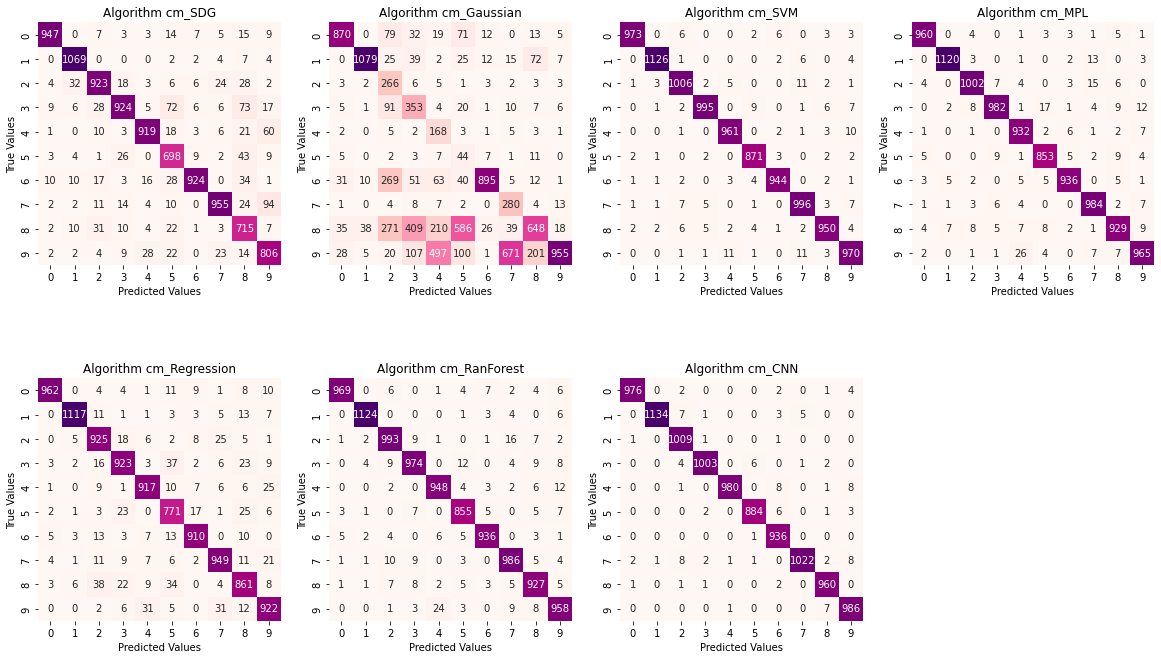

In [28]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_predict_CNN_plt = np.argmax(y_predict_CNN, 1) # Decode Predicted labels
y_test_CNN_plt = np.argmax(y_test_CNN, 1) # Decode labels

cm_SDG = confusion_matrix(y_test, y_predict_SDG)
cm_Gaussian = confusion_matrix(y_test, y_predict_Gaussian)
cm_SVM = confusion_matrix(y_test, y_predict_SVM)
cm_MPL = confusion_matrix(y_test, y_predict_MPL)
cm_Regression = confusion_matrix(y_test, y_predict_Regression)
cm_RanForest = confusion_matrix(y_test, y_predict_RanForest)
cm_CNN = confusion_matrix(y_test_CNN_plt, y_predict_CNN_plt) # Confusion matrix
cm_All=[cm_SDG,cm_Gaussian,cm_SVM,cm_MPL,cm_Regression,cm_RanForest,cm_CNN,cm_CNN]

fig, axis = plt.subplots(2, 4, figsize=(20, 12))
for i, ax in enumerate(axis.flat):
    sns.heatmap(cm_All[i].T, cmap=plt.cm.RdPu , fmt="d", annot=True, cbar=False, square=True, ax = ax)
    ax.set(ylabel = "True Values")
    ax.set(xlabel = "Predicted Values")
    vnames = [name for name in globals() if globals()[name] is cm_All[i]]
    ax.set(title = f"Algorithm {vnames[0]}")
    if(i == 7):
        ax.clear()
        ax.set_axis_off()
        continue

Por último, comprobamos cuantas predicciones fueron correctas
* El mejor modelo es el CNN
* El peor modelo es el Gaussian

In [29]:
from sklearn.metrics import accuracy_score

data = [[accuracy_score(y_test, y_predict_SDG), accuracy_score(y_test, y_predict_Gaussian), 
         accuracy_score(y_test, y_predict_SVM), accuracy_score(y_test, y_predict_MPL),
         accuracy_score(y_test, y_predict_Regression), accuracy_score(y_test, y_predict_RanForest),
         accuracy_score(y_test_CNN_plt, y_predict_CNN_plt)]]
pd.DataFrame(data, columns=["SGD","Gaussian","SVM","MLP","Regression","RanForest", "CNN"], index=["Accuracy"])

,SDG,Gaussian,SVM,MPL,Regression,RanForest,CNN
Accuracy,0.888,0.5558,0.9792,0.9663,0.9257,0.967,0.989


## 7. Prueba con Datos Externos al MNIST
Para finalizar, vamos a intentar predecir que número estamos escribiendo, estas imagenes las vamos a realizar nosotros en un cnavas de 28x28 pixeles con paint.  
Creamos cada uno de los dígitos y, por cada uno, lo evaluamos con cada modelo.

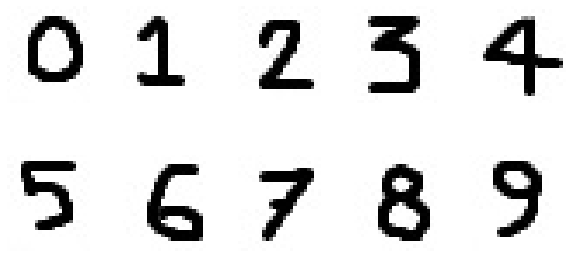

In [132]:
%matplotlib inline

from PIL import Image
MNISTDraw = ["0.jpg","1.jpg","2.jpg","3.jpg","4.jpg",
             "5.jpg","6.jpg","7.jpg","8.jpg","9.jpg"]
MNIST_SDG = []
MNIST_GAU = []
MNIST_SVM = []
MNIST_MLP = []
MNIST_REG = []
MNIST_RFO = []
MNIST_CNN = []

import matplotlib
import matplotlib.pyplot as plt

fig, axis = plt.subplots(2, 5, figsize=(10,5))
for i, ax in enumerate(axis.flat):
    jpgfile = Image.open("./MNISTDraw/"+MNISTDraw[i])
    ax.imshow(jpgfile, cmap=matplotlib.cm.binary, interpolation="nearest")
    ax.axis("off")
    
    MNISTDrawNP = np.array(jpgfile)
    MNISTPredict = [MNISTDrawNP[:,:,0].reshape(784)]
    MNISTPredict_CNN = MNISTDrawNP[:,:,0].reshape(784)/255.0
    MNISTPredict_CNN = MNISTPredict_CNN.reshape(-1,28,28,1)
    
    MNIST_SDG = MNIST_SDG + [my_model_SDG.predict(MNISTPredict)[0]]
    MNIST_GAU = MNIST_GAU + [my_model_Gaussian.predict(MNISTPredict)[0]]
    MNIST_SVM = MNIST_SVM + [my_model_SVM.predict(MNISTPredict)[0]]
    MNIST_MLP = MNIST_MLP + [my_model_MPL.predict(MNISTPredict)[0]]
    MNIST_REG = MNIST_REG + [my_model_Regression.predict(MNISTPredict)[0]]
    MNIST_RFO = MNIST_RFO + [my_model_RanForest.predict(MNISTPredict)[0]]
    MNIST_CNN = MNIST_CNN + [np.argmax(my_model_CNN.predict([MNISTPredict_CNN]), 1)[0]]

Nuestros modelos parecian tener un alto índice de exactitud pero al meter datos creados en paint nos encontramos con resultados poco satisfactorios.
* El mejor modelo es CNN on 3 respuestas correctas y SGD con 2 respuestas correctas
* El número que más veces se predice correctamente es el 5

In [133]:
data = [MNIST_SDG, MNIST_GAU, MNIST_SVM, MNIST_MLP, MNIST_REG, MNIST_RFO,MNIST_CNN]
pd.DataFrame(data, columns=MNISTDraw, 
             index=["SGD","Gaussian","SVM","MLP","Regression","RanForest", "CNN"])

,0.jpg,1.jpg,2.jpg,3.jpg,4.jpg,5.jpg,6.jpg,7.jpg,8.jpg,9.jpg
SGD,5,7,7,2,2,5,7,7,7,2
Gaussian,2,2,2,2,2,7,2,2,2,2
SVM,5,5,5,5,5,5,5,5,5,5
MLP,3,8,7,8,3,8,3,2,8,8
Regression,5,5,5,5,5,5,3,5,5,5
RanForest,3,8,4,2,2,8,3,0,2,8
CNN,0,1,4,5,1,0,5,7,6,5
